In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

D:\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# 读取 mnist 数据
from keras.datasets import mnist
(x_train_image,y_train_label),(x_test_image,y_test_label) = mnist.load_data()

In [3]:
# reshape
x_train = x_train_image.reshape(60000,784).astype('float32')
x_test = x_test_image.reshape(10000,784).astype('float32')

In [6]:
# 特征标准化，label one-hot编码
x_train_normalize=x_train / 255
x_test_normalize = x_test / 255

y_train_onehot = np_utils.to_categorical(y_train_label)
y_test_onehot = np_utils.to_categorical(y_test_label)


In [7]:
##################################
# 建立模型

In [8]:
from keras.models import Sequential
from keras.layers import Dense

In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=256,
               input_dim=784,
               kernel_initializer='normal',
               activation='relu'))

In [14]:
model.add(Dense(units=10,
               kernel_initializer='normal',
               activation='softmax'))

In [15]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
###########################################
# 进行训练

In [17]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [18]:
train_history = model.fit(x=x_train_normalize,
                         y=y_train_onehot,
                         validation_split=0.2,
                         epochs=10,
                         batch_size=200,
                         verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.4382 - acc: 0.8827 - val_loss: 0.2181 - val_acc: 0.9407
Epoch 2/10
 - 2s - loss: 0.1909 - acc: 0.9456 - val_loss: 0.1555 - val_acc: 0.9557
Epoch 3/10
 - 2s - loss: 0.1355 - acc: 0.9619 - val_loss: 0.1258 - val_acc: 0.9648
Epoch 4/10
 - 2s - loss: 0.1025 - acc: 0.9704 - val_loss: 0.1116 - val_acc: 0.9685
Epoch 5/10
 - 2s - loss: 0.0809 - acc: 0.9775 - val_loss: 0.0978 - val_acc: 0.9718
Epoch 6/10
 - 2s - loss: 0.0658 - acc: 0.9819 - val_loss: 0.0937 - val_acc: 0.9725
Epoch 7/10
 - 2s - loss: 0.0543 - acc: 0.9851 - val_loss: 0.0907 - val_acc: 0.9743
Epoch 8/10
 - 2s - loss: 0.0458 - acc: 0.9876 - val_loss: 0.0827 - val_acc: 0.9761
Epoch 9/10
 - 2s - loss: 0.0379 - acc: 0.9903 - val_loss: 0.0815 - val_acc: 0.9760
Epoch 10/10
 - 2s - loss: 0.0316 - acc: 0.9919 - val_loss: 0.0807 - val_acc: 0.9768


In [29]:
import  matplotlib.pyplot as plt
def show_train_history(train_history, train,validation):
    fig = plt.gcf()
    fig.set_size_inches(10,6)
    ax = fig.add_axes([0.1,0.1,0.8,0.8])
    ax.plot(train_history.history[train])
    ax.plot(train_history.history[validation])
    
    ax.set_title("Train History")
    ax.set_xlabel('Epoch')
    ax.set_ylabel(train)
    ax.legend(['train','validation'],loc='upper left')
    fig.show()

D:\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


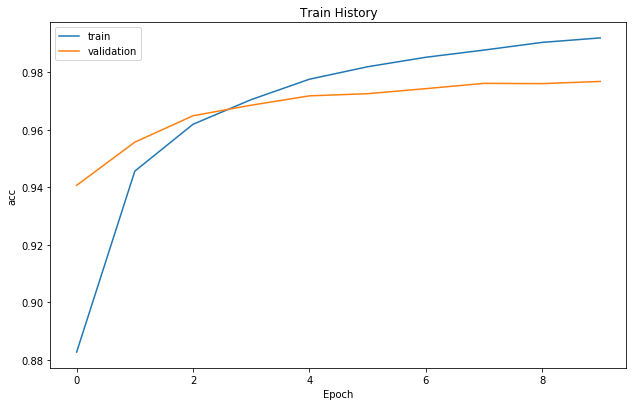

In [30]:
show_train_history(train_history,'acc','val_acc')

D:\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


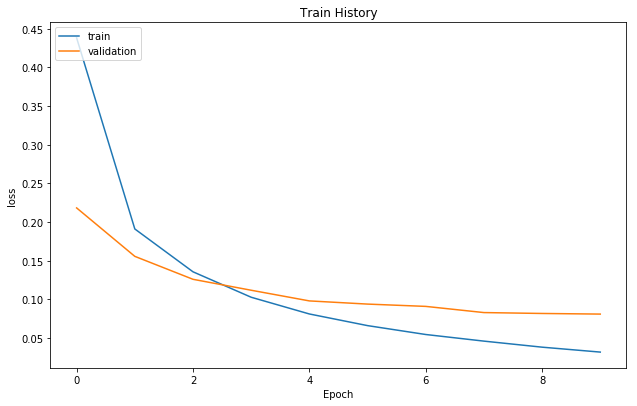

In [31]:
show_train_history(train_history,'loss','val_loss')